In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
import sys

sys.path.insert(0, "python")
from network import *
from protocols import *
from adversary import *
from simulator import *
from experiments import run_and_eval, run_experiment

In [6]:
def shorten_protocol_name(x: str):
    val = x.replace("Protocol", "").replace("spreading_proba", "p")
    val = val.split("broadcast")[0][:-1].replace("(", ": ")
    if val[-1] == ",":
        val = val[:-1]
    return val

In [7]:
nw_generator = NodeWeightGenerator("random")
ew_generator = EdgeWeightGenerator("normal")

# Dandelion example

net = Network(nw_generator, ew_generator, num_nodes=1000, k=20)

In [ ]:
seed = 32
net = Network(nw_generator, ew_generator, num_nodes=10, k=2, seed=seed)

In [ ]:
np.mean(list(dict(net.graph.degree).values()))

In [ ]:
tor = TOREnhancedProtocol(net, 1, 2, broadcast_mode="all", seed=seed)

In [ ]:
np.mean(list(dict(net.graph.degree).values()))

In [ ]:
tor.tor_network

In [ ]:
tor.tor_network

In [ ]:
np.random.seed(seed)
np.random.random(3)

In [ ]:
np.random.random(3)

In [ ]:
msg = Message(0)
adv = Adversary(tor, 0.1)

In [ ]:
msg.queue

In [ ]:
msg.process(tor, adv)

In [ ]:
list(net.graph.neighbors(4))

In [ ]:
alma

In [ ]:
dp = DandelionProtocol(net, 0.5)

In [ ]:
dp.anonymity_network.num_edges

dp = DandelionPlusPlusProtocol(net, 0.5)

nx.draw(dp.anonymity_graph, node_size=20)

In [ ]:
%%time
adv = Adversary(net, 0.1)
sim = Simulator(dp, adv, 30, verbose=False)
sim.run()

In [ ]:
%%time
evaluator = Evaluator(sim, "first_reach")
print(evaluator.get_report())

In [ ]:
%%time
evaluator = Evaluator(sim, "first_sent")
print(evaluator.get_report())

In [ ]:
%%time
evaluator = Evaluator(sim, "dummy")
print(evaluator.get_report())

# Unittest in the making

In [2]:
import sys, os, pytest

sys.path.insert(0, "%s/python" % os.getcwd())
import networkx as nx
from network import Network, NodeWeightGenerator, EdgeWeightGenerator
from simulator import Simulator, Evaluator
from message import Message
from protocols import BroadcastProtocol, DandelionProtocol, DandelionPlusPlusProtocol
from adversary import Adversary

None


ValueError: You should not use `broatcast_mode='sqrt'` with average graph degree less than 9! The provided graph has 2.0 average degree.

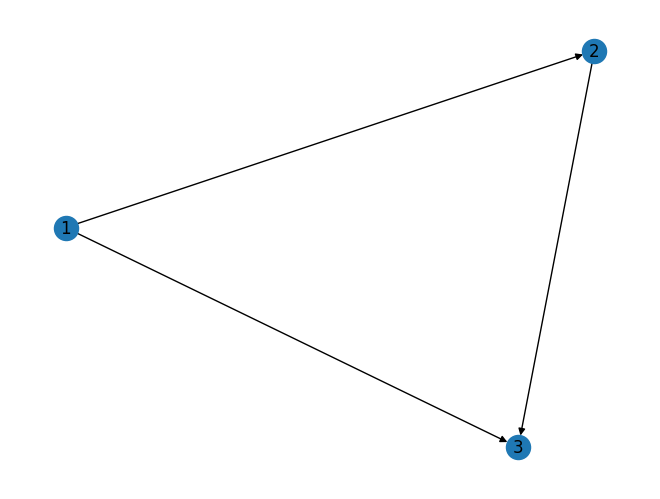

In [8]:
### First sent vs First reach test
rnd_node_weight = NodeWeightGenerator("random")
rnd_edge_weight = EdgeWeightGenerator("random")
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.add_weighted_edges_from([(1, 2, 0.9), (1, 3, 1.84), (2, 3, 1.01)], weight="latency")
print(nx.draw(G, with_labels=True))
net = Network(rnd_node_weight, EdgeWeightGenerator("custom"), graph=G)
protocol = BroadcastProtocol(net, seed=44)
adv = Adversary(net, ratio=0.0, adversaries=[2])
print(adv.nodes)
assert 3 in adv.nodes

# start a message from Node 1
msg = Message(1)
receiver_order = [1, 2, 2, 2]
for i, receiver in enumerate(receiver_order):
    msg.process(protocol, adv)
    print(i, receiver, msg.history)
    assert receiver in msg.history
    # assert len(msg.history) == i + 1

In [9]:
sim = Simulator(protocol, adv, 1, True)
sim.run(1.0)
for estimator in ["first_reach", "first_sent"]:
    evaluator = Evaluator(sim, estimator)
    results = [
        evaluator.exact_hits,
        evaluator.ranks,
        evaluator.inverse_ranks,
        evaluator.entropies,
    ]
    for i in results:
        print(estimator, i)

NameError: name 'protocol' is not defined

In [10]:
rnd_node_weight = NodeWeightGenerator("random")
rnd_edge_weight = EdgeWeightGenerator("random")
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.add_weighted_edges_from([(1, 2, 0.9), (1, 3, 1.84), (2, 3, 0.85)], weight="latency")

net = Network(rnd_node_weight, EdgeWeightGenerator("custom"), graph=G)
protocol = BroadcastProtocol(net, "all", seed=44)
adv = Adversary(protocol, ratio=0.0, adversaries=[3])
sim = Simulator(adv, 1, messages=[Message(1)])

assert 3 in sim.adversary.nodes
assert len(sim.messages)==1

new_reports = run_and_eval(sim)

sim.messages[0].flush_queue(sim.adversary)

print(new_reports)
assert sim.adversary.predict_msg_source("first_sent").iloc[0][1]==1
assert sim.adversary.predict_msg_source("first_reach").iloc[0][2]==1

[{'estimator': 'first_reach', 'hit_ratio': 0.0, 'inverse_rank': 0.5, 'entropy': 0.0, 'ndcg': 0.6309297535714575, 'message_spread_ratio': 1.0, 'mean_contact_time_quantiles': [0.18000000000000002, 0.36000000000000004, 0.54, 0.7200000000000001, 0.9, 1.07, 1.2400000000000002, 1.4100000000000001, 1.58], 'std_contact_time_quantiles': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'adversary': 'Adversary(ratio=0.33, active=False, use_node_weights=False)', 'protocol': 'BroadcastProtocol(broadcast_mode=all)', 'network': 'Network(nw_mode=random, ew_mode=custom, num_nodes=3, k=-1)'}, {'estimator': 'first_sent', 'hit_ratio': 0.0, 'inverse_rank': 0.5, 'entropy': 0.0, 'ndcg': 0.6309297535714575, 'message_spread_ratio': 1.0, 'mean_contact_time_quantiles': [0.18000000000000002, 0.36000000000000004, 0.54, 0.7200000000000001, 0.9, 1.07, 1.2400000000000002, 1.4100000000000001, 1.58], 'std_contact_time_quantiles': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'adversary': 'Adversary(ratio=0.33, active=Fa

In [7]:
### Dandelion adversary in the making
H = nx.complete_graph(10)
rnd_node_weight = NodeWeightGenerator("random")
rnd_edge_weight = EdgeWeightGenerator("random")
SEED = 43
net = Network(
    rnd_node_weight, EdgeWeightGenerator("unweighted"), graph=H, seed=SEED
)
protocol = DandelionProtocol(net, 1 / 4, broadcast_mode="all", seed=SEED)
adv = Adversary(protocol, 0.2)
msg = Message(0)

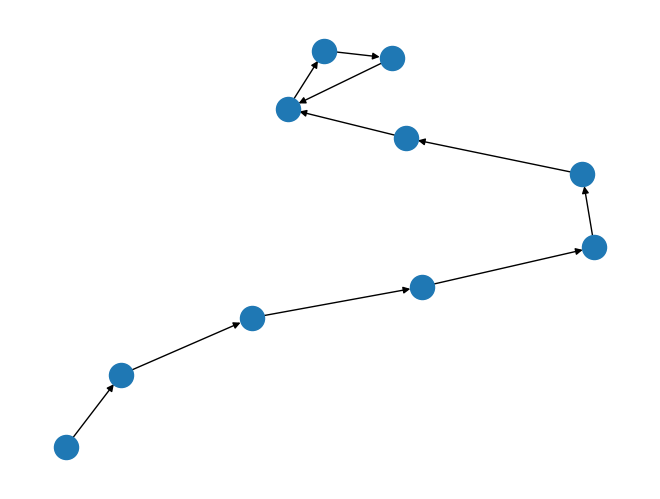

In [9]:
nx.draw(protocol.anonymity_graph)